<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.2.2: Regularisation

In [61]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [62]:
## Load the Diabetes dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [63]:
# Description
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [64]:
# Predictors
X = df
X.shape

(442, 10)

In [65]:
# Target
y = diabetes.target
y.shape

(442,)

#### 1.2 Create a Base Model Using Linear Regression

In [66]:
# Create Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
# Fit
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Score
model.score(X_test, y_test)

0.5508475878410108

In [69]:
# Check Coeffiricent
model.coef_

array([  22.0638072 , -243.0965219 ,  454.84179878,  303.4833927 ,
       -658.65329915,  337.78232773,   34.28886973,  209.54255233,
        634.00797414,  137.14111851])

In [70]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

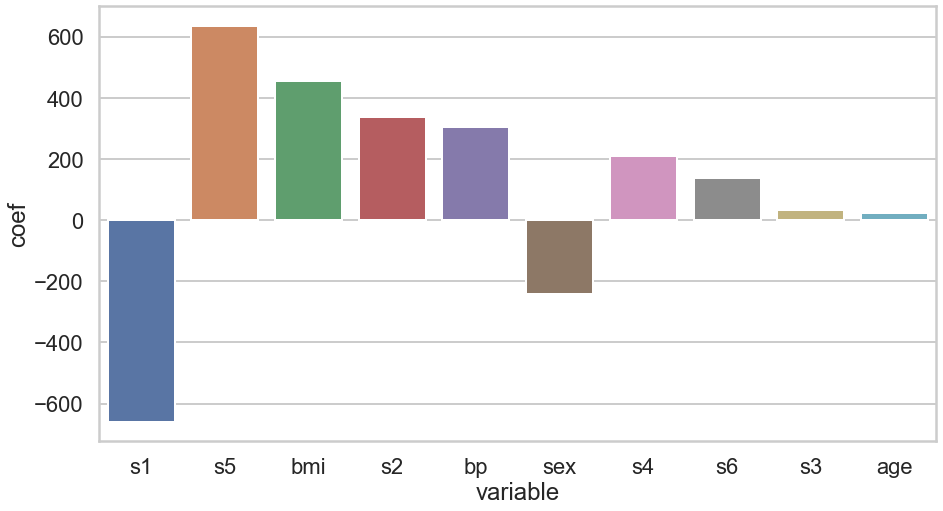

In [71]:
# Plot Coefficients
plt.figure(figsize=(15,8))
view_coeff(X, model)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

In [72]:
from sklearn.linear_model import Ridge
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

##### 1.3.2 Visual Represenantion of Coefficient of Ridge Model

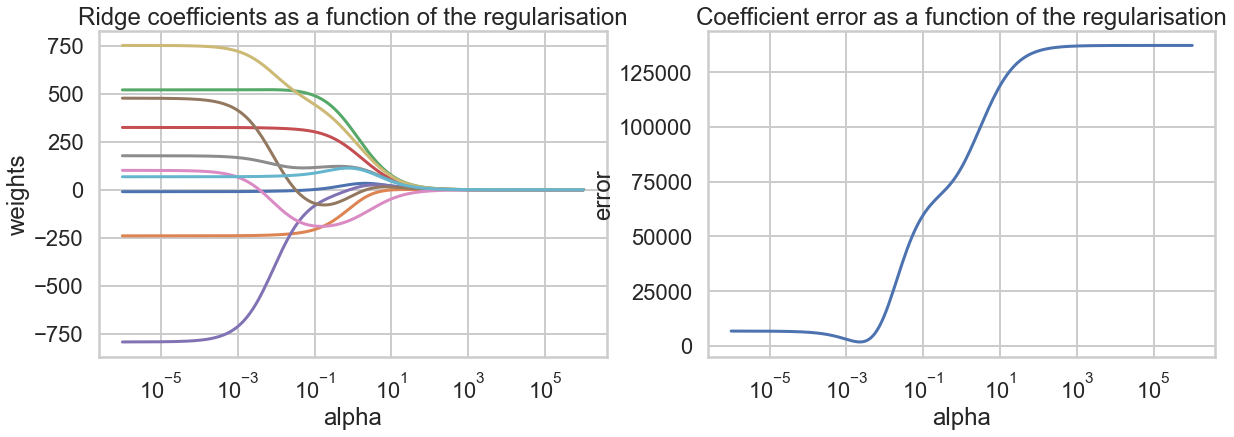

In [73]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [74]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138362231730856


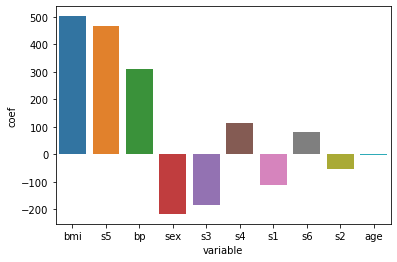

In [39]:
view_coeff(X, optimal_ridge)

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

In [75]:
from sklearn.linear_model import Lasso
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lasso = Lasso()
# keep track of the intermediate results for coefficients and errors
lasso_coef = []
lasso_error = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)
# Train the model with different regularisation strengths
for i in lasso_alphas:
    lasso.set_params(alpha = i)
    lasso.fit(X, y)
    lasso_coef.append(lasso.coef_)
    lasso_error.append(mean_squared_error(lasso.coef_, model.coef_))

##### 1.4.2 Visual Represenantion of Coefficient of Lasso Model

Hint: Same as Ridge

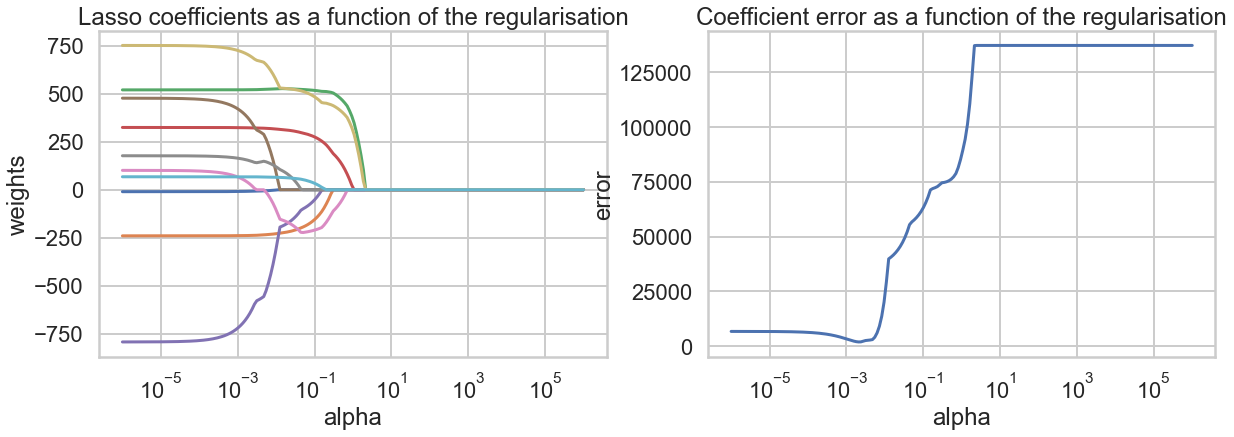

In [76]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, lasso_coef)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, lasso_error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.4.3. [BONUS]  Find an optimal value for Loass regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [77]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.05805225516094896
Score: 0.512648775957248


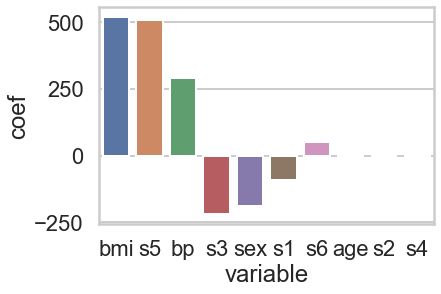

In [78]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

In [79]:
# Build the ridge and lasso using optimal alpha
op_ridge = Ridge(alpha=0.066)
op_ridge.fit(X_train, y_train)
r2 = op_ridge.score(X_test, y_test)
print(f'Ridge: {r2}')

op_lasso = Lasso(alpha=0.058)
op_lasso.fit(X_train, y_train)
r2z = op_lasso.score(X_test, y_test)
print(f'Lasso: {r2z}')

# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge

Ridge: 0.5359624874661439
Lasso: 0.5451957072024025


In [80]:
# model residuals:
ridge_residual = cross_val_score(op_ridge, X, y, cv=10)
lasso_residual = cross_val_score(op_lasso, X, y, cv=10)

print(f'{ridge_residual}')
print('')
print(f'{lasso_residual}')

[0.53237316 0.24704979 0.38099462 0.60845201 0.28206496 0.62104986
 0.43075154 0.4335743  0.43040323 0.66877424]

[0.52886812 0.24507714 0.38539949 0.60333868 0.2742915  0.62875901
 0.4433498  0.43838847 0.42615039 0.67876749]


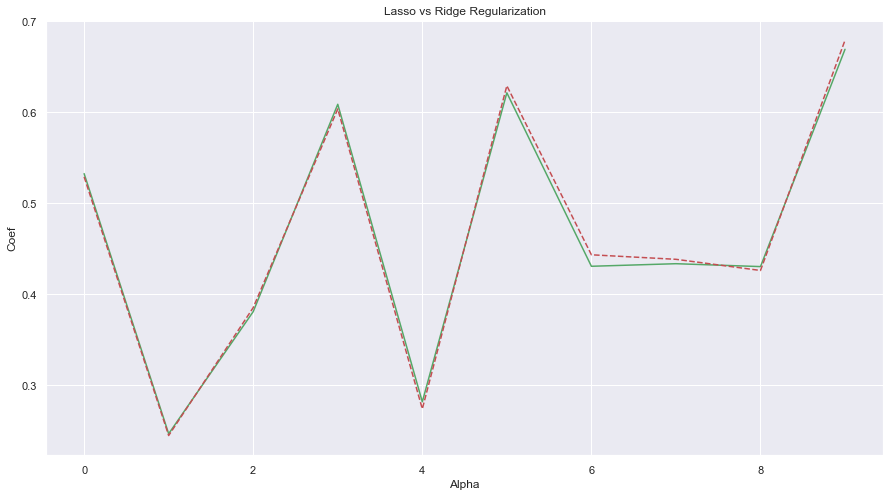

In [60]:
# Jointplot
plt.figure(figsize=(15,8))

plt.plot(ridge_residual, color='g', linestyle='-')
plt.plot(lasso_residual, color='r', linestyle='--')
plt.xlabel('Alpha')
plt.ylabel('Coef')
plt.title('Lasso vs Ridge Regularization')
plt.show()



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



